In [0]:
import numpy as np
import torch as t
from torchvision.datasets import MNIST # 导入 pytorch 内置的 mnist 数据
from torch.utils.data import DataLoader
from torch import nn
import time
import matplotlib.pyplot as plt

In [0]:
def transform(x):
    x = np.array(x, dtype='float32')
    x = (x - 0.5) / 0.5
    x = x.reshape((-1,))
    return x

train_set = MNIST('./data', train=True, transform=transform, download=True)
test_set = MNIST('./data', train=True, transform=transform, download=True)

criterion = nn.CrossEntropyLoss()

In [0]:
def sgd_update(parameters, lr):
    for param in parameters:
        param.data = param.data - lr * param.grad.data

- learning rate：    
学习率太大会使得损失函数不断回跳，从而无法让损失函数较好降低，所以我们一般都是用一个比较小的学习率

- batch size：  
这里 batch size 为 64，可以看到 loss 仍然存在震荡，但这并没有关系，如果 batch size 太大，对于内存的需求就更高，同时也不利于网络跳出局部极小点，所以现在普遍使用基于 batch 的随机梯度下降法，而 batch 的多少基于实际情况进行考虑

In [28]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
device = t.device("cpu")

net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10)
)

losses = []
idx = 0

start_time = time.time()
for epoch in range(5):
    train_loss = 0
    for img, label in train_loader:
        img = img.to(device)
        label = label.to(device)
        # forward
        out = net(img)
        loss = criterion(out, label)
        # backward
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(), 1e-3)
        # 记录loss
        train_loss += loss.item()
        if idx % 30 == 0:
            losses.append(loss.item())
        idx += 1
        
    print('epoch: {}, training loss: {:.6f}'.format(epoch, train_loss / len(train_loader)))

end_time = time.time()
print('time cost: {:.3f}'.format(end_time - start_time))

epoch: 0, training loss: 1.461953
epoch: 1, training loss: 0.251432
epoch: 2, training loss: 0.195022
epoch: 3, training loss: 0.160416
epoch: 4, training loss: 0.137731
time cost: 23.720


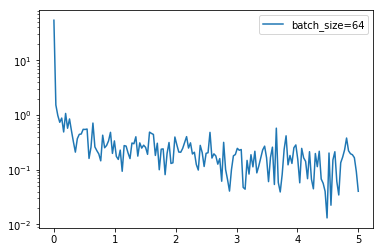

In [29]:
x = np.linspace(0, 5, len(losses), endpoint = True)
plt.semilogy(x, losses, label = 'batch_size=64')  # 绘制y轴对数坐标轴
plt.legend(loc='best')

使用pytorch内置的optimizer

In [30]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
device = t.device("cpu")

net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10)
)

optimizer = t.optim.SGD(net.parameters(), 1e-3)

start_time = time.time()
for epoch in range(5):
    train_loss = 0
    for img, label in train_loader:
        img = img.to(device)
        label = label.to(device)
        # forward
        out = net(img)
        loss = criterion(out, label)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录loss
        train_loss += loss.item()
        if idx % 30 == 0:
            losses.append(loss.item())
        idx += 1
        
    print('epoch: {}, training loss: {:.6f}'.format(epoch, train_loss / len(train_loader)))

end_time = time.time()
print('time cost: {:.3f}'.format(end_time - start_time))

epoch: 0, training loss: 1.145503
epoch: 1, training loss: 0.217325
epoch: 2, training loss: 0.161647
epoch: 3, training loss: 0.131949
epoch: 4, training loss: 0.114267
time cost: 23.002
